<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/170324_DR_grading_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/DR fundus images/split')

['train', 'val', 'test']

In [5]:
os.listdir('/content/drive/MyDrive/DR fundus images/split/train'), os.listdir('/content/drive/MyDrive/DR fundus images/split/val'), os.listdir('/content/drive/MyDrive/DR fundus images/split/test')

(['DR2', 'DR3', 'DR1'], ['DR2', 'DR3', 'DR1'], ['DR2', 'DR3', 'DR1'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator()

trainimages=datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                        target_size=(64,64))
valimages=datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                        target_size=(64,64))
testimages=datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                        target_size=(64,64))

Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model=Sequential([Conv2D(32,(3,3), activation='relu', input_shape = (64,64,3)),
                  MaxPooling2D(2,2),

                  Conv2D(64,(3,3), activation='relu'),
                  MaxPooling2D(2,2),
                  Conv2D(64,(3,3), activation='relu'),
                  MaxPooling2D(2,2),

                  Flatten(),
                  Dense(128, activation='relu'),
                  Dense(3, activation='softmax')])

model.compile(optimizer = "rmsprop",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 64)         

In [52]:
model.fit(trainimages,
          batch_size=10,
          epochs=45,
          validation_data=valimages)
model.save('DRgrading_model.keras')

Epoch 1/45
3/3 [==============================] - 7s 3s/step - loss: 6.1842e-04 - accuracy: 1.0000 - val_loss: 1.2742 - val_accuracy: 0.7143
Epoch 2/45
3/3 [==============================] - 6s 2s/step - loss: 4.5939e-04 - accuracy: 1.0000 - val_loss: 1.4033 - val_accuracy: 0.7143
Epoch 3/45
3/3 [==============================] - 5s 2s/step - loss: 5.5000e-04 - accuracy: 1.0000 - val_loss: 1.3377 - val_accuracy: 0.7143
Epoch 4/45
3/3 [==============================] - 7s 2s/step - loss: 3.8204e-04 - accuracy: 1.0000 - val_loss: 1.2781 - val_accuracy: 0.7143
Epoch 5/45
3/3 [==============================] - 5s 2s/step - loss: 6.6746e-04 - accuracy: 1.0000 - val_loss: 1.2462 - val_accuracy: 0.7143
Epoch 6/45
3/3 [==============================] - 6s 2s/step - loss: 4.0884e-04 - accuracy: 1.0000 - val_loss: 1.5519 - val_accuracy: 0.7143
Epoch 7/45
3/3 [==============================] - 6s 2s/step - loss: 2.8870e-04 - accuracy: 1.0000 - val_loss: 1.4091 - val_accuracy: 0.7143
Epoch 8/45
3/

In [53]:
y_pred= model.predict(testimages)
y_pred

1/1 [==============================] - 1s 756ms/step


array([[8.4243780e-08, 1.5154593e-02, 9.8484534e-01],
       [6.8051054e-04, 9.8900980e-01, 1.0309645e-02],
       [9.9206874e-05, 1.1631762e-02, 9.8826897e-01],
       [2.7475469e-03, 1.1839815e-06, 9.9725121e-01],
       [9.9993688e-01, 1.1431000e-06, 6.1888386e-05],
       [9.7727150e-01, 1.1285039e-06, 2.2727368e-02],
       [1.3439737e-06, 9.8907417e-01, 1.0924596e-02],
       [2.2972115e-06, 5.6166410e-01, 4.3833354e-01],
       [1.7349033e-09, 9.9995565e-01, 4.4332111e-05],
       [1.5131154e-14, 1.0444483e-05, 9.9998951e-01],
       [1.2846315e-01, 4.4880217e-04, 8.7108803e-01],
       [3.2316391e-05, 9.7334719e-01, 2.6620429e-02],
       [1.3591329e-10, 4.8166299e-01, 5.1833701e-01],
       [4.3054078e-07, 5.2637792e-05, 9.9994695e-01]], dtype=float32)

In [54]:
y_pred1=np.argmax(y_pred,axis=1)
y_pred1

array([2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2])

In [21]:
y_true=testimages.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [22]:
testimages.class_indices

{'DR1': 0, 'DR2': 1, 'DR3': 2}

In [55]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[0, 1, 2],
       [2, 3, 1],
       [0, 1, 4]])

In [47]:
print(metrics.classification_report(y_true,y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.50      0.55         6
           2       0.57      0.80      0.67         5

    accuracy                           0.57        14
   macro avg       0.56      0.54      0.54        14
weighted avg       0.57      0.57      0.56        14



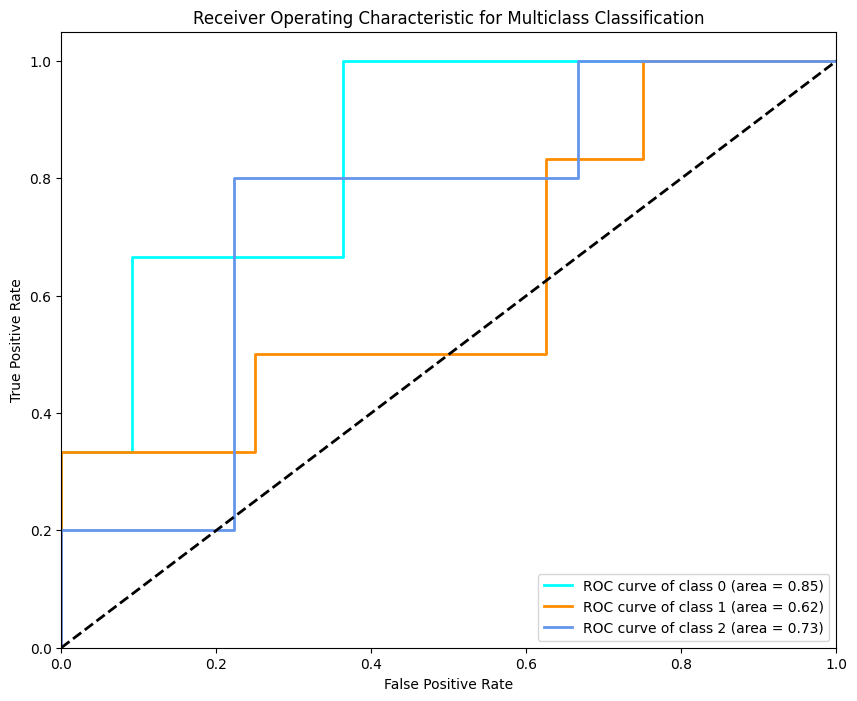

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/DRgrading_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR1/1ffa95ca-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 133ms/step
Prediction: DR3


In [50]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93de-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

1/1 [==============================] - 0s 24ms/step
Prediction: DR3


In [51]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR3/1ffa930d-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

1/1 [==============================] - 0s 88ms/step
Prediction: DR3


In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)